# A notebook to model a scan based on obsids

In [125]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from pygsm import GSMObserver
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy import units as u
from mwapy.pb import beam_full_EE
from datetime import datetime
from astropy import time
import matplotlib.animation as animation
import glob
from astropy.coordinates import get_sun

In [118]:
nside = 64
inds = np.arange(hp.nside2npix(nside))
theta, phi = hp.pix2ang(nside, inds)

In [119]:
# Set up beam
tile = beam_full_EE.ApertureArray('/data4/beards/code/MWA_Tools/mwapy/data/mwa_full_embedded_element_pattern.h5',
                                  140e6)

i = 6
amps = np.zeros((2, 16))
amps[:, i] = 1
mybeam = beam_full_EE.Beam(tile, np.zeros((2, 16)), amps)
b = mybeam.get_response(phi, theta)
# TODO: Figure out what this actually is
power_beam = np.abs(b[0, 0])**2 + np.abs(b[0, 1])**2

# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152 points. This may take a while!
# WARNING:mwapy.pb.beam_full_EE: Calculating for 49152 points. This may take a while!


In [120]:
ov = GSMObserver()
ov.lon = str(116.67081524)
ov.lat = str(-26.70331940)
ov.elev = 0        

In [121]:
run = 0
obses = np.loadtxt('/home/beards/code/mwa_mmodes/data_getting/run' + str(run) + '.txt', dtype=np.long)
# obses = obses[::10]

<IPython.core.display.Javascript object>


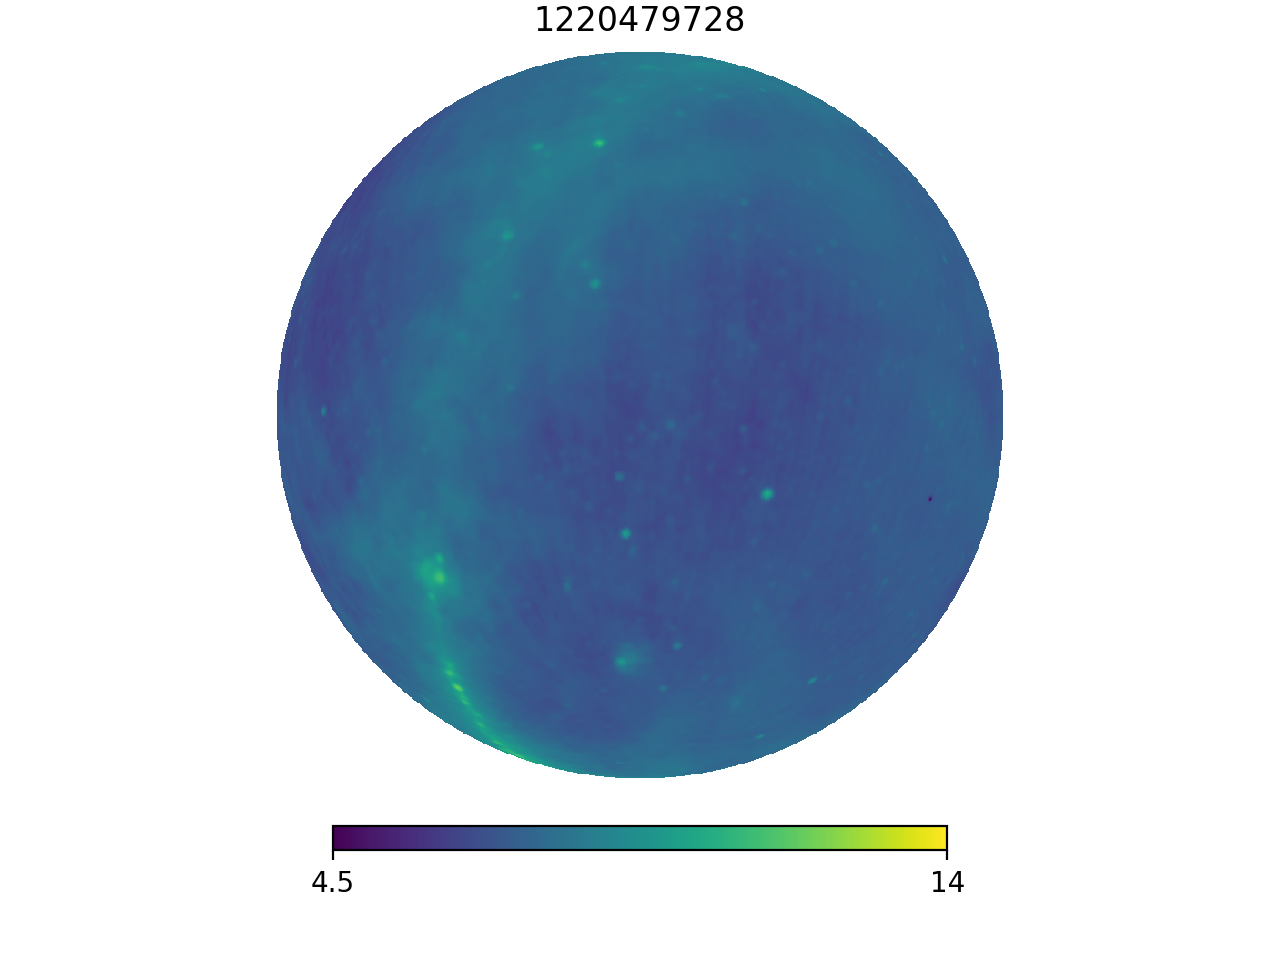

In [113]:
fig = plt.figure()
freq = 180

def func(n):
    plt.clf()
    dt = time.Time(obses[n], format='gps').datetime
    ov.date = dt
    ov.generate(freq)
    ov.view(logged=True, min=4.5, max=14, fig=fig.number, title='')
    plt.gca().set_title(str(obses[n]))

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

ani = animation.FuncAnimation(fig, func, frames=len(obses), interval=20, blit=False)
ani.save('test.mp4', writer=writer)

In [ ]:
# TODO:
# add beam shading
# use danny's file with sources
# add sun

In [122]:
ov.generate(180)

masked_array(data=[151.71284426960023, --, --, ..., --, --,
                   169.1032840124586],
             mask=[False,  True,  True, ...,  True,  True, False],
       fill_value=-1.6375e+30)

In [138]:
cena_ra = 13.5 * 180 / 12
cena_dec = -43.

<IPython.core.display.Javascript object>


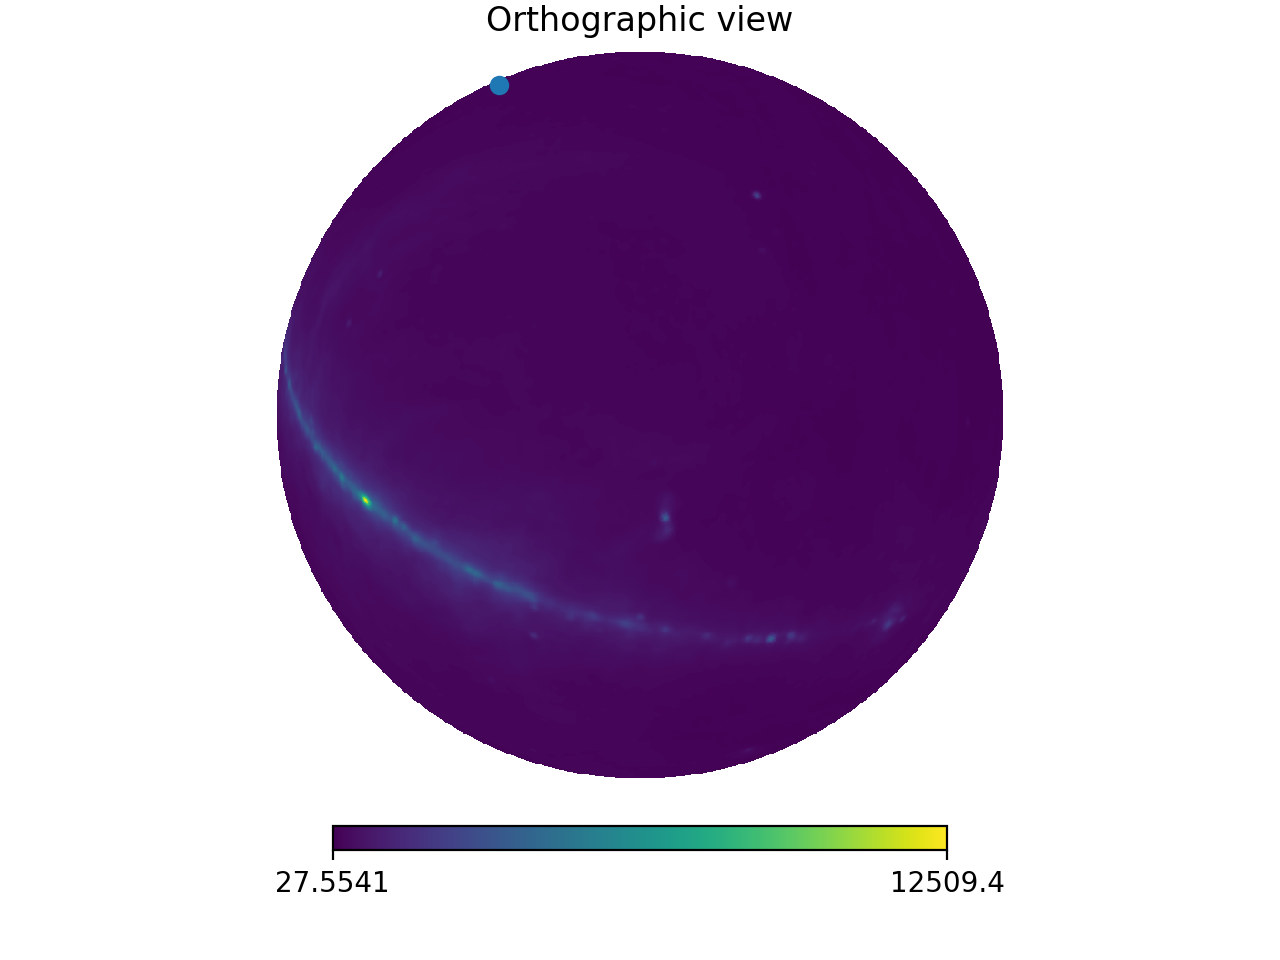

In [152]:
fig = plt.figure()
ov.view(fig=fig.number)

ra_rad, dec_rad = ov.radec_of(0, np.pi/2)
ra_deg  = ra_rad / np.pi * 180
dec_deg = dec_rad / np.pi * 180
# plt.figure()
hp.visufunc.projscatter(cena_ra, cena_dec, lonlat=True, rot=[ra_deg, dec_deg], coord='C')

In [128]:
sun_loc = get_sun(time.Time(obses[0], format='gps'))

In [131]:
ov.radec_of

(3145728,)

In [136]:
# use this function to trace pixel coordinates:
# https://github.com/telegraphic/PyGSM/blob/cea53ec3657f9ca87b4e827846506d71d68eced4/pygsm/pygsm.py#L254